# import thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Data Preprocessing

- Đọc file dữ liệu và in 5 giá trị đầu của data

In [2]:
data = pd.read_csv('College.csv')
data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
# kiem tra kieu du lieu va so cot khong null
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [4]:
# Hàm mô tả về dataframe bao gồm độ lệch chuẩn, phương sai, phân vị, trung bình của từng cột từng độ rút ra các nhận xét riêng
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


Drop cột dữ liệu này vì cột này không có ý nghĩa về mặt ô đồ vì nó là tên của các trường đại học nó là giá trị độc nhất

In [5]:
data = data.drop('Unnamed: 0',axis =1)

- Giá trị sau khi drop và không có giá trị nào null

In [6]:
data.isnull().sum()

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

- chuyển đổi dữ liệu thuộc kiểu category sang number 

In [7]:
#tạo cập giá trị yes là 1 no là 0
Bin = {'Yes': 1,
       'No':0
      }
# thay đổi các khoảng giá trị bằng giá trị đánh số từ trước
data['Private']=data['Private'].map(Bin)

# Implement the KMeans clustering algorithm from scratch using Numpy, not using Sklearn (just for the Testing and Validation step)

In [8]:
# định nghĩa class
class KMeansCustom:
    # hàm khởi tạo các tham số theo yêu cầu
    def __init__(self, k_clusters=8,convergence_tol =1e-4, max_iter=1000):
        self.k_clusters = k_clusters
        self.convergence_tol = convergence_tol
        self.max_iter = max_iter
        self.cluster_centers = None
        self.labels = None
        self.n_iter = None
        self.inertia= None
    # tạo ngẫu nhiên các centroids
    def initialize_centroids(self,X):
        ids = np.random.permutation(X.shape[0])
        centroids = X[ids[:self.k_clusters]]
        return centroids
    # cập nhật vị trí của centroid 
    def update_centroids(self,X,labels):
        return np.array([X[labels==k].mean(axis=0) for k in range(self.k_clusters)])
    # kiểm tra sự hội tụ 
    def has_converged(self, old_centroids, new_centroids):
        return np.allclose(old_centroids, new_centroids, atol=self.convergence_tol)
    # đánh giá sự hiệu quả của phân cụm
    def compute_wcv(self, X, centroids, labels):
        return sum(np.linalg.norm(X[labels == k] - centroids[k])**2 for k in range(self.k_clusters))
    #hàm fit dựa trên thuật toán phân cụm của k means 
    #1. tạo ngẫu nhiên các centroids
    #2. tính khoảng cách từ các Xi dến các centroid
    #3. gán các giá trị label mới
    #4. cập nhật vị trí mới của centroids
    #5. Kiểm tra sự hội tụ
    ###
    
    def fit(self,X):
        #Initialize centroids
        self.cluster_centers = self.initialize_centroids(X)
        it = 0
        while True:
            # tính khoảng cách từ các Xi dến các centroid
            distances  = distance.cdist(X,self.cluster_centers)
            # gán nhãn mới
            self.labels = np.argmin(distances,axis= 1)
            # cập nhật vị trí mới của centroids
            new_centers = self.update_centroids(X, self.labels)
            # Kiểm tra sự hội tụ
            if self.has_converged(self.cluster_centers, new_centers) or it >= self.max_iter:
                break
            self.cluster_centers = new_centers
            it = it +1
        self.inertia = self.compute_wcv(X,self.cluster_centers,self.labels)
        self.n_iter = it
    # các hàm transform và predict cũng như fit transform và fit predict
    def transform(self, X):
        distances = distance.cdist(X, self.cluster_centers)
        return distances
    def predict(self, X):
        distances = self.transform(X)
        return np.argmin(distances, axis=1)
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)
    def fit_predict(self, X):
        self.fit(X)
        return self.labels

# Testing and Validation and Analysis and Interpretation:

- Tách cột Private ra khỏi dữ liệu cần train

In [9]:
X = data.drop('Private',axis =1).values

In [10]:
# scale dữ liệu theo StandardScaler
sc = StandardScaler()
X_scale=sc.fit_transform(X)

- Test your custom KMeans class implementation on the provided dataset: chọn ngẫu nhiên có 3 cụm để kiểm tra 

In [11]:
kmeans_custom = KMeansCustom(k_clusters=3)

In [12]:
kmeans_custom.fit(X_scale)

In [13]:
# Dự đoạn nhãn cụm
labels = kmeans_custom.predict(X_scale)

In Các Kết quả ra bao gồm Cluster centers, labels cũng như các giá trị tham số có trong class KMeansCustom

In [14]:
print("Cluster centers\n", kmeans_custom.cluster_centers)

Cluster centers
 [[ 1.81861542  1.98324371  2.17742729  0.21312774  0.3963945   2.24102657
   1.5506977  -0.54722804 -0.17545299  0.31935167  0.81370065  0.6768766
   0.66983425  0.59946104 -0.58112243 -0.07284792 -0.35075069]
 [-0.37655587 -0.36631884 -0.34285235 -0.52932608 -0.55894768 -0.31786013
  -0.12935824 -0.47245245 -0.36670467 -0.1029071   0.03399847 -0.56361867
  -0.56125977  0.22791348 -0.33436162 -0.43871107 -0.35686425]
 [-0.03491912 -0.11663877 -0.23321938  0.85584974  0.83757607 -0.30207524
  -0.36957759  1.04868266  0.71768809  0.05906132 -0.37449144  0.73753847
   0.73607726 -0.6354434   0.8170256   0.80568529  0.76794361]]


In [15]:
print("Labels:\n", labels)

Labels:
 [1 1 1 2 1 1 2 2 2 1 2 2 1 2 1 1 2 1 1 1 2 0 1 0 2 1 2 0 1 2 1 2 1 1 1 1 2
 2 1 0 2 1 1 1 2 1 1 1 2 1 1 1 1 1 2 1 1 1 1 0 2 0 1 2 2 1 1 1 1 0 2 2 2 1
 2 1 1 1 0 0 1 1 1 1 2 1 2 2 1 1 1 2 1 1 2 1 2 1 1 1 1 2 1 1 1 1 2 1 2 1 2
 1 1 1 2 2 1 2 0 1 2 1 2 2 1 1 1 2 1 1 2 1 1 1 1 1 1 2 2 2 2 0 1 1 2 1 1 1
 1 2 2 2 2 1 1 1 1 1 2 2 1 1 2 2 2 1 1 1 1 1 1 2 2 2 2 2 0 1 1 1 1 1 1 1 2
 2 1 1 1 1 2 2 1 2 1 1 2 1 1 1 2 0 1 0 1 2 1 1 1 1 1 1 1 2 1 1 1 1 0 2 1 2
 0 0 1 2 1 2 1 1 2 1 1 1 1 1 1 2 1 1 2 1 2 2 2 1 1 1 1 2 2 2 1 2 2 2 2 0 2
 2 2 1 1 1 1 1 1 1 2 0 2 1 1 0 0 1 1 0 2 0 1 1 1 2 2 1 1 2 0 1 1 1 2 1 1 1
 2 1 1 2 1 2 1 1 1 1 2 2 2 2 1 1 1 2 1 1 1 1 2 1 1 1 1 1 0 1 2 2 2 2 2 1 1
 1 2 1 1 1 2 2 1 1 2 1 2 0 2 1 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 2 0 0 1 1 1
 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 2 1 2 2 1 2 1 1 1 2 2 1
 0 1 2 1 1 0 1 2 1 1 1 0 0 0 1 1 1 2 1 1 1 2 2 2 2 0 2 1 1 0 1 1 1 0 2 1 2
 1 0 2 1 1 1 1 1 1 2 1 1 2 1 2 2 2 0 1 1 2 1 1 2 2 2 2 2 2 1 2 1 2 1 1 1 2
 2 1 0 1 1 1 1 1

In [16]:
print("Inertia:", kmeans_custom.inertia)
print("Number of iterations:", kmeans_custom.n_iter)

Inertia: 8254.50452037304
Number of iterations: 13


* Validate the correctness of your implementation by comparing results with sklearn's KMeans implementation

In [17]:
# Sử dụng KMeans Từ thư viên Sk Learn để kiểm tra 
kmeans =KMeans(n_clusters=3)
kmeans.fit(X_scale)

D:\anacon\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anacon\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=3)

In [18]:
# Dự đoạn nhãn cụm Dự đoán nhãn cụm trên 
labels_kmeans = kmeans.predict(X_scale)

In [19]:
print("Labels:\n", labels_kmeans)

Labels:
 [1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 2 1 2 0 1 0 2 1 0 1 0 1 1 1 1 0
 0 1 2 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 2 0 2 1 0 0 1 1 1 1 2 0 0 0 1
 0 1 1 1 2 2 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0
 1 1 1 0 0 1 0 2 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 2 1 1 0 1 1 1
 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 2 1 1 1 1 1 1 1 0
 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 2 1 2 1 0 1 1 1 1 1 1 1 0 1 1 1 1 2 0 1 0
 2 2 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 2 0
 0 0 1 1 1 1 1 1 1 0 2 0 1 1 2 2 1 1 2 0 2 1 1 1 0 0 1 1 0 2 1 1 1 0 1 1 1
 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 2 1 0 0 0 0 0 1 1
 1 0 1 1 1 0 0 1 1 0 1 0 2 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 2 2 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1
 2 1 0 1 1 2 1 0 1 1 1 2 2 2 1 1 1 0 1 1 1 0 0 0 0 2 0 1 1 2 1 1 1 2 0 1 0
 1 2 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 2 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0
 0 1 2 1 1 1 1 1

* Kiểm tra CLuster centers của class kmeans tự custom và dùng trên thư viện sk learn

In [20]:
custom_centers = kmeans_custom.cluster_centers
sklearn_centers = kmeans.cluster_centers_
print("Custom KMeans centers:")
print(custom_centers)
print("Sklearn KMeans centers:")
print(sklearn_centers)

Custom KMeans centers:
[[ 1.81861542  1.98324371  2.17742729  0.21312774  0.3963945   2.24102657
   1.5506977  -0.54722804 -0.17545299  0.31935167  0.81370065  0.6768766
   0.66983425  0.59946104 -0.58112243 -0.07284792 -0.35075069]
 [-0.37655587 -0.36631884 -0.34285235 -0.52932608 -0.55894768 -0.31786013
  -0.12935824 -0.47245245 -0.36670467 -0.1029071   0.03399847 -0.56361867
  -0.56125977  0.22791348 -0.33436162 -0.43871107 -0.35686425]
 [-0.03491912 -0.11663877 -0.23321938  0.85584974  0.83757607 -0.30207524
  -0.36957759  1.04868266  0.71768809  0.05906132 -0.37449144  0.73753847
   0.73607726 -0.6354434   0.8170256   0.80568529  0.76794361]]
Sklearn KMeans centers:
[[-0.04240503 -0.12264378 -0.23809842  0.83574983  0.82070141 -0.30572398
  -0.37117873  1.03436648  0.70912808  0.05817637 -0.37571509  0.73244448
   0.72924513 -0.63261623  0.82043419  0.79056093  0.75802079]
 [-0.36999889 -0.35980676 -0.33511242 -0.53070445 -0.55831112 -0.30983851
  -0.12470744 -0.48071016 -0.372128

In [21]:
print("Number of iterations:", kmeans.n_iter_)

Number of iterations: 14


In [22]:
# Tính toán SSE cho cả hai triển khai
print(f"Custom KMeans SSE: {kmeans_custom.inertia}")
print(f"Sklearn KMeans SSE: {kmeans.inertia_}")

Custom KMeans SSE: 8254.50452037304
Sklearn KMeans SSE: 8254.444647603481


kết Luận:

- Tính tương đồng cao: Kết quả SSE rất tương đồng giữa hai phương pháp, cho thấy rằng cả Custom KMeans và scikit-learn KMeans đều phân cụm dữ liệu một 
cách hiệu quả và tương đương nhau.- 
Chất lượng cụm: Cả hai thuật toán đều tạo ra các cụm với chất lượng cao, vì các điểm dữ liệu gần với centroids của cụm mà chúng được gán vào
- 
Lựa chọn thuật toán: Với SSE gần như tương đương, lựa chọn giữa Custom KMeans và scikit-learn KMeans có thể dựa trên các yếu tố khác như hiệu suất thời gia  dễphát triển.

In [23]:
# Kiểm tra sự khác biệt giữa các trung tâm cụm
center = np.linalg.norm(np.sort(sklearn_centers, axis=0) - np.sort(custom_centers, axis=0))
print(f"Difference between centers: {center}")
# Kiểm tra sự khác biệt giữa các nhãn
label = np.sum(labels_kmeans != labels)
print(f"Number of different labels: {label}")

Difference between centers: 0.08423317787067212
Number of different labels: 345


Nhìn vào kết quả có thể thấy sự khác nhau giữ cacsn centers là rất thấp diều này cho thấy việc sử dụng k means từ sk learn hay class tự custom đều cho kết quả tương tự nhau ở centers nhưng bên cạnh đó sau nhiều lần chạy thửu thì các nhãn có sự khác biệt điều này có thể hiểu là do cách triển khai thuật toán ở class custom có sự khác biệt gì đó đôi chút nhưng kết quả cuối cùng lại có sự tương quan giống nhau khá là cao

Vẽ kết quả của các cluster và centroids dựa trên class kmeancustom và sk learn kmeans

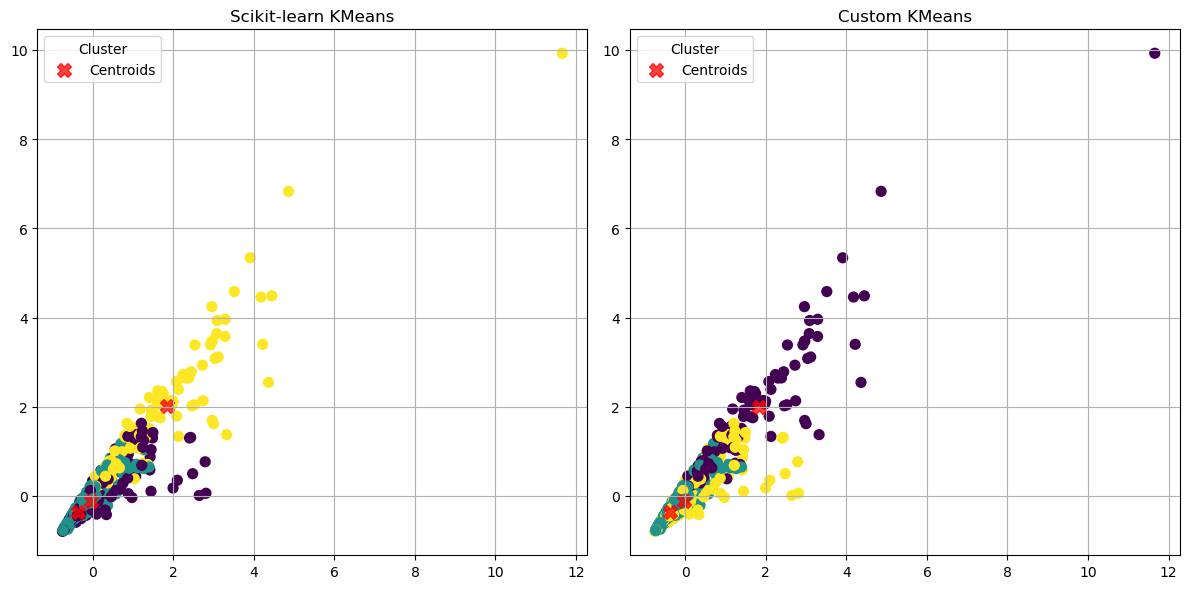

In [24]:
# Trực quan hóa kết quả của SK kmens
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_scale[:, 0], X_scale[:, 1], c=labels_kmeans, s=50, cmap='viridis')
plt.scatter(sklearn_centers[:, 0], sklearn_centers[:, 1], c='red', s=100,label ='Centroids', alpha=0.75,marker = 'X')
plt.title('Scikit-learn KMeans')
plt.legend(title='Cluster')
plt.grid()
# Trực quan hóa kết quả của Custom KMeans
plt.subplot(1, 2, 2)
plt.scatter(X_scale[:, 0], X_scale[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(custom_centers[:, 0], custom_centers[:, 1], c='red', s=100, label ='Centroids',alpha=0.75,marker = 'X')
plt.title('Custom KMeans')
plt.grid()
plt.legend(title='Cluster')


plt.tight_layout()
plt.show()


Từ hai biểu đồ vừa vẽ được có thể nhận thấy các centroids và vị trí của các cụm cluster có vẻ tương đồng nhau chỉ là vị trí của các cụm có vẻ khác nhau có thể là do cách viết hàm khác với thư viện ở mặt phân chia tên cluters về mặt triển khai nhưng nhìn chungg mặt dữ liệu và các centroids có sự ăn khớp cao, nói xâu hơn thì cụm từ thuật toán SK learn có sự phân tán rõ ràng hơn và ít bị phân tán hơn khi dùng claas KMeans Custom, 

* Kiểm tra kết quả độ chính xác khi thực hiện hai phương pháp

In [25]:
conf_matrix = confusion_matrix(kmeans_custom.labels, kmeans.labels_)
class_report = classification_report(kmeans_custom.labels, kmeans.labels_)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[  0   2  93]
 [  4 432   0]
 [246   0   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        95
           1       1.00      0.99      0.99       436
           2       0.00      0.00      0.00       246

    accuracy                           0.56       777
   macro avg       0.33      0.33      0.33       777
weighted avg       0.56      0.56      0.56       777



- Do Thuật toán không có set random state nên mọi lần chạy đều cho kết quả khác nhau ghi nhận accuracy nằm khoảng từ 0.2 đến 0.83 đều này có thể thấy sự ăn khớp của class k means tự custom và kmeans từ thư viện sk learn có sự tương quan nhất định với nhau
- Precision, Recall, F1-score: Các chỉ số này cung cấp thông tin về độ chính xác của việc phân cụm tương ứng với từng cụm cũng tương tự đều có cái nhìn khách quan nhất về phân cụm
- Macro avg và weighted avg: Các chỉ số trung bình này cung cấp cái nhìn tổng quan về hiệu suất của phân cụm trên tất cả các cụm

* Experiment with different values of K (number of clusters) and choose an optimal value based on appropriate evaluation metrics (e.g., silhouette score, elbow method).

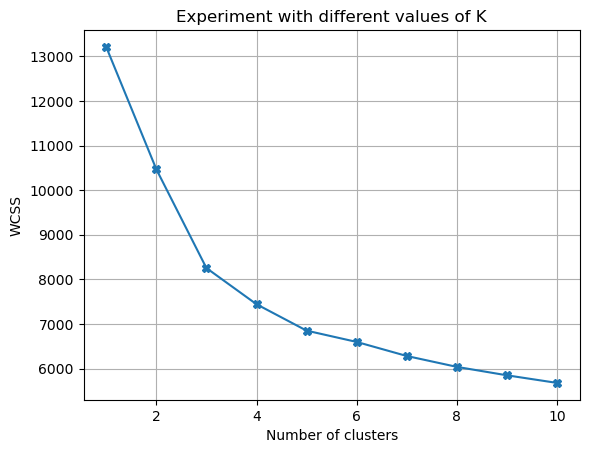

In [26]:
# Within-Cluster Sum of Square(Tổng Bình Phương trong Cụm)
# Sử dựng thuật toán khuỷn tay
wcss = [] 
# Kiểm tra từ 1 đến 10 phân cụm 
for i in range(1, 11):
    kmeans_custom_test = KMeansCustom(k_clusters = i, convergence_tol=1e-5,max_iter=400)
    kmeans_custom_test.fit(X_scale) 
    wcss.append(kmeans_custom_test.inertia)

plt.plot(range(1, 11), wcss,marker='X')
plt.title("Experiment with different values of K")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.grid()
plt.show()

Từ đồ thị có thể chọn được gía trị cụm tối ưu của k khoảng từ [3-5]( do sự phân chiia ngẫu nhiên sau mỗi lần chạy) từ đây đồ thì có vẻ bắt đầu songg song với trục hoành

Trực quan hóa dữ liệu từ kết quả K = 3 lên dữ lệu và pca data ban đầu xuống 2 chiều

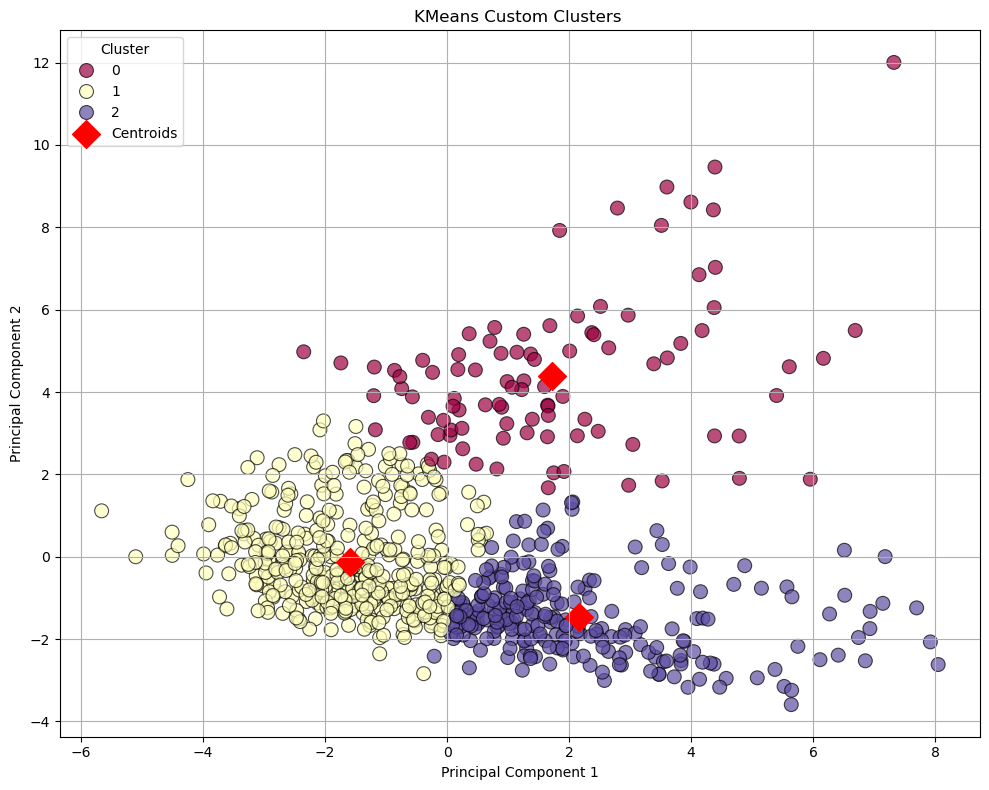

In [27]:
# Giảm Chiều dữ liệu xuống còn 2 để dễ thực hiện
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scale)

# Create a DataFrame for PCA results
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = kmeans_custom.labels

# Calculate the centroids in the original space
centroids = kmeans_custom.cluster_centers

# Transform the centroids to the PCA space
centroids_pca = pca.transform(centroids)
df_centroids = pd.DataFrame(data=centroids_pca, columns=['PCA1', 'PCA2'])
df_centroids['cluster'] = range(len(centroids))
# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df_pca, palette='Spectral', s=100, alpha=0.7, edgecolor='k')
plt.scatter(df_centroids['PCA1'], df_centroids['PCA2'], s=200, c='red', label='Centroids', marker='D')


plt.title('KMeans Custom Clusters ')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')

plt.grid()
plt.tight_layout()
plt.show()

Theo Biểu đồ Thi kết quả phân cụm khá tốt trên dữ liệu đã được scale không có sự lệch hẳn giữa các label, và từ biểu đồ có thể thấy cụm có giá trị màu vàng có sự phân tán rộng hơn cho thấy ở cluster này có sự đa dạng về dữ liệu. bên cạnh đó cụm màu tính và màu cà chua có mật độ dữ liệu tập trung hơn cho thấy dữ liệu mức độ tương quan với nhau khá là cao. Và cũng như không có sự phân chia quá rõ rệt giữa đường biên của hai cluster này

* Compare the results of your K-means and the Sklearn K-means with the Private attribute in the dataset (ground truth).

* Kiểm tra với dữ liệu X Có scale

In [28]:
test_custom_kmeans_scale = KMeansCustom(k_clusters=2)
test_custom_kmeans_scale.fit(X_scale)
labels_test_custom_X_scale = test_custom_kmeans_scale.labels

In [29]:
test_sk_kmeans_scale = KMeans(n_clusters=2)
test_sk_kmeans_scale.fit(X_scale)
label_test_skkemans_X_scale = test_sk_kmeans_scale.labels_

D:\anacon\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anacon\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [30]:
# Tính toán các chỉ số đánh giá
ari_Kmeanscustom_scale = adjusted_rand_score(labels_test_custom_X_scale,data['Private'])
ari_sklearnKmeans_scale = adjusted_rand_score(label_test_skkemans_X_scale,data['Private'])
nmi_Kmeanscustom_scale = normalized_mutual_info_score(labels_test_custom_X_scale,data['Private'])
nmi_sklearnKmeans = normalized_mutual_info_score(label_test_skkemans_X_scale,data['Private'])
#in ket qua
print(f"ARI Custom KMeans vs Ground Truth Có scale: {ari_Kmeanscustom_scale}")
print(f"ARI Sklearn KMeans vs Ground Truth Có scale: {ari_sklearnKmeans_scale}")
print(f"NMI Custom KMeans vs Ground Truth Có scale: {nmi_Kmeanscustom_scale}")
print(f"NMI Sklearn KMeans vs Ground Truth Có scale: {nmi_sklearnKmeans}")


ARI Custom KMeans vs Ground Truth Có scale: -0.012097811710501172
ARI Sklearn KMeans vs Ground Truth Có scale: -0.012097811710501172
NMI Custom KMeans vs Ground Truth Có scale: 0.005216049934234966
NMI Sklearn KMeans vs Ground Truth Có scale: 0.005216049934234966


Các chỉ sổ ARI và NMI trên ta có thêm nhận xét sau: ARI và NMI đều rất thấp cho cả hai phương pháp KMeans custom và Sk KMeans. Điều này cho thấy cả hai phương pháp không phân cụm tốt dữ liệu khi được chuẩn hóa, và kết quả phân cụm không phù hợp với ground truth (thuộc tính Private). Các biểu đồ trực quan hóa( Hình bên dưới ) cũng cho thấy sự phân tách giữa các cụm không rõ ràng, với nhiều điểm dữ liệu nằm gần biên giới giữa các cụm. Bên đó chỉ số NMI cũng khá thấp điều này cho thấy giữa hai thuật toán cho ra hai cụm gần như không có thông tin chung.

* Kiểm tra với dữ liệu X không scale 

In [31]:
test_custom_kmeans = KMeansCustom(k_clusters=2)
test_custom_kmeans.fit(X)
labels_test_custom = test_custom_kmeans.labels

In [32]:
test_sk_kmeans = KMeans(n_clusters=2)
test_sk_kmeans.fit(X)
label_test_skkemans = test_sk_kmeans.labels_

D:\anacon\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anacon\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [33]:
# Tính toán các chỉ số đánh giá
ari_Kmeanscustom = adjusted_rand_score(labels_test_custom,data['Private'])
ari_sklearnKmeans = adjusted_rand_score(label_test_skkemans,data['Private'])
nmi_Kmeanscustom = normalized_mutual_info_score(labels_test_custom,data['Private'])
nmi_sklearnKmeans = normalized_mutual_info_score(label_test_skkemans,data['Private'])
#in ket qua
print(f"ARI Custom KMeans vs Ground Truth: {ari_Kmeanscustom}")
print(f"ARI Sklearn KMeans vs Ground Truth: {ari_sklearnKmeans}")
print(f"NMI Custom KMeans vs Ground Truth: {nmi_Kmeanscustom}")
print(f"NMI Sklearn KMeans vs Ground Truth: {nmi_sklearnKmeans}")


ARI Custom KMeans vs Ground Truth: 0.22700271229120822
ARI Sklearn KMeans vs Ground Truth: 0.22700271229120822
NMI Custom KMeans vs Ground Truth: 0.12383711448814683
NMI Sklearn KMeans vs Ground Truth: 0.12383711448814683


Các chỉ só ARI VÀ NMI Trên có thể nhận xét: Các chỉ số này cho thấy KMeans Custom, Sk KMeans khi dữ liệu không được chuẩn hóa có vẻ sấp xỉ nhau và không có độ chênh lệch quá lớn. Kết quảcủa ARI của hai thuạt toán điều dương cho thấy khi không scale dữ liệu có vẻ phù hợp hơn Biểu đồ trực quan (hình bên dưới) cho thấy sự phân tách giữa các cụm rõ ràng hơn và ít chồng lấn giữa hai thuật toán..

* đây là kết quả sau một chạy thử ngẫu nhiên ( Mỗi lần chạy sẽ ra kết quả khác vì không có set randomstate nhưng kết quả giữa hai thuật toán không có sự chênh lệch quá lớn điều sem nhau
    - Adjusted Rand Index Custom KMeans vs Ground Truth có scale: -0.0120
    - Adjusted Rand Index Sklearn KMeans vs Ground Truth có scale: -0.0120
    - Normalized Mutual Information Custom KMeans vs  Ground Truth có scale  0.00521
    - Normalized Mutual Information Sklearn KMeans vs Ground Truth có scale  0.00521
    - Adjusted Rand Index Custom KMeans vs Ground Truth: 0.22700
    - Adjusted Rand Index Sklearn KMeans vs Ground Truth: 0.22700
    - Normalized Mutual Information Custom KMeans vs Ground Truth: 0.259
    - Normalized Mutual Information Sklearn KMeans vs Ground Truth: 0.123

# Kết Luận
- Khi dữ liệu được scale: Cả hai thuật toán đều không hoạt động tốt, dẫn đến hiệu suất phân cụm kém và không phù hợp với ground truth.
- Khi dữ liệu không được scale: KMeans custom hoạt động tốt hơn so với Sk KMeans, với khả năng nắm bắt thông tin liên quan đến ground truth tốt hơn và sự phân tách cụm rõ ràng hơn
* Từ đó suy ra dữ liệu không có scale sẽ phù hợp hơn với ground truth.

Có scale dữ liệu

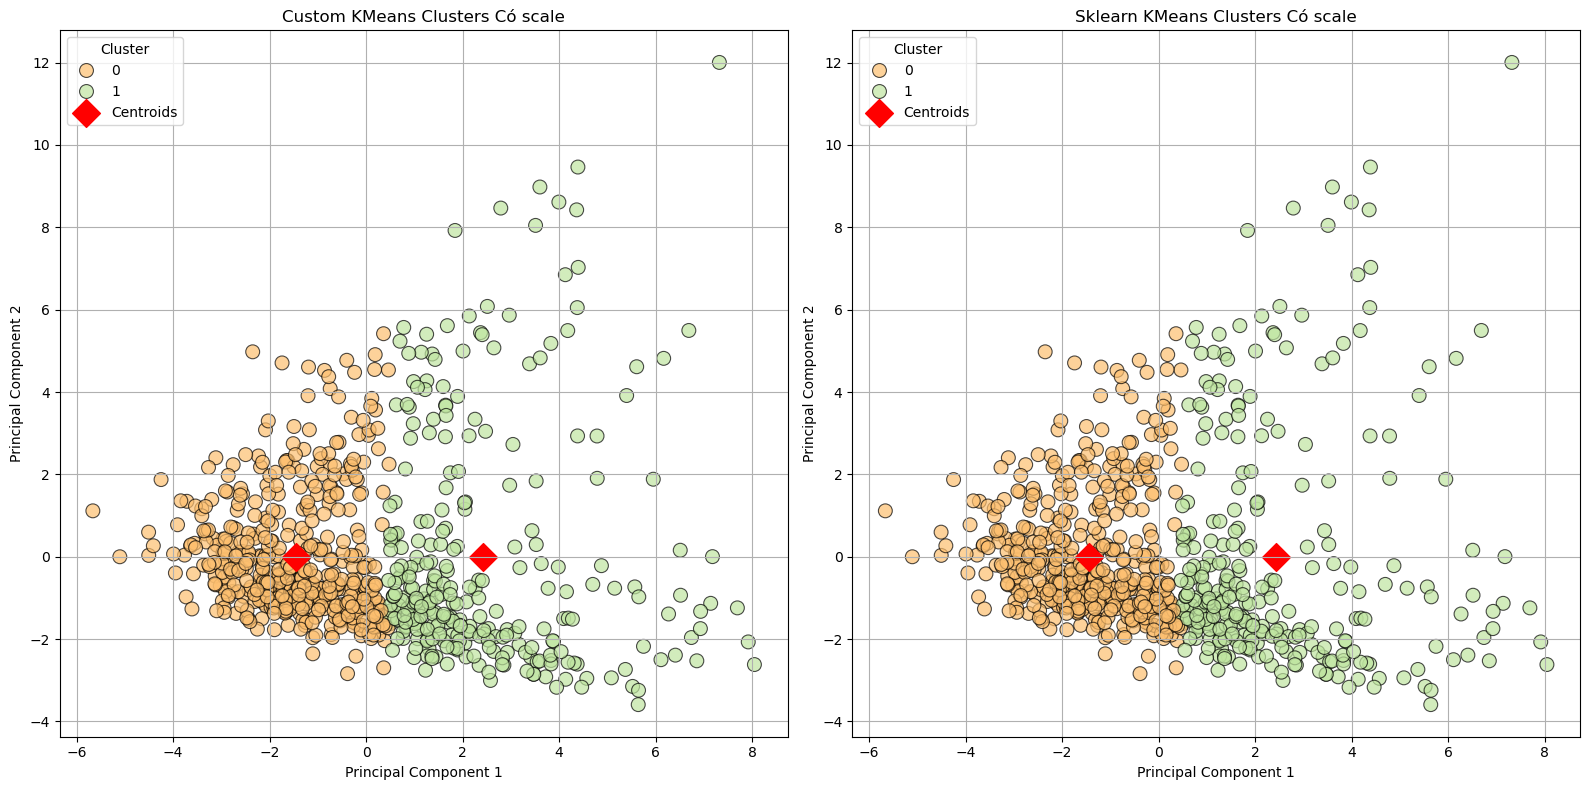

In [34]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scale)
Private = data['Private']
# Trực quan hóa phân cụm
data_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
data_pca['Custom KMeans'] = labels_test_custom_X_scale
data_pca['Sklearn KMeans'] = label_test_skkemans_X_scale
data_pca['Ground Truth'] = Private

# Trực quan hóa centroids
# dùng class kmeans custom
centroids = test_custom_kmeans_scale.cluster_centers
centroids_pca = pca.transform(centroids)
data_centroids = pd.DataFrame(data=centroids_pca, columns=['PCA1', 'PCA2'])
data_centroids['cluster'] = range(len(centroids))
# dùng sk kmeans
centroids = test_sk_kmeans_scale.cluster_centers_
centroids_pca = pca.transform(centroids)
data_centroids_sk = pd.DataFrame(data=centroids_pca, columns=['PCA1', 'PCA2'])
data_centroids_sk['cluster'] = range(len(centroids))

plt.figure(figsize=(16, 8))
# vẽ biểu đồ thứ 1
plt.subplot(1, 2, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='Custom KMeans', data=data_pca, palette='Spectral', s=100, alpha=0.7, edgecolor='k')
plt.scatter(data_centroids_sk['PCA1'], data_centroids_sk['PCA2'], s=200, c='red', label='Centroids', marker='D')
plt.title('Custom KMeans Clusters Có scale')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid()
# vẽ biểu đồ thứ 2
plt.subplot(1, 2, 2)
sns.scatterplot(x='PCA1', y='PCA2', hue='Sklearn KMeans', data=data_pca, palette='Spectral', s=100, alpha=0.7, edgecolor='k')
plt.scatter(data_centroids['PCA1'], data_centroids['PCA2'], s=200, c='red', label='Centroids', marker='D')
plt.title('Sklearn KMeans Clusters Có scale')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.tight_layout()
plt.show()

- Custom KMeans Clusters Có scale với biểu đồ cho thấy cluster 0 có mật độ phân tán tập trung và dày hơn hơn cluster 1
- Sklearn KMeans Clusters Có scale với biểu đồ này cho thấy sự tương tự về mặt hình ảnh nhưng với thuật toán từ thư viên có thể thấy mật độ dữ liệu có vẻ được phân tán rộng hơn nhưng không đáng kể


=> Từ hai ý trên có thể rút ra kết luận rằng hai phương pháp đó có sự tương đồng khá lớn với nhau 

Khi Không có scale dữ liệu

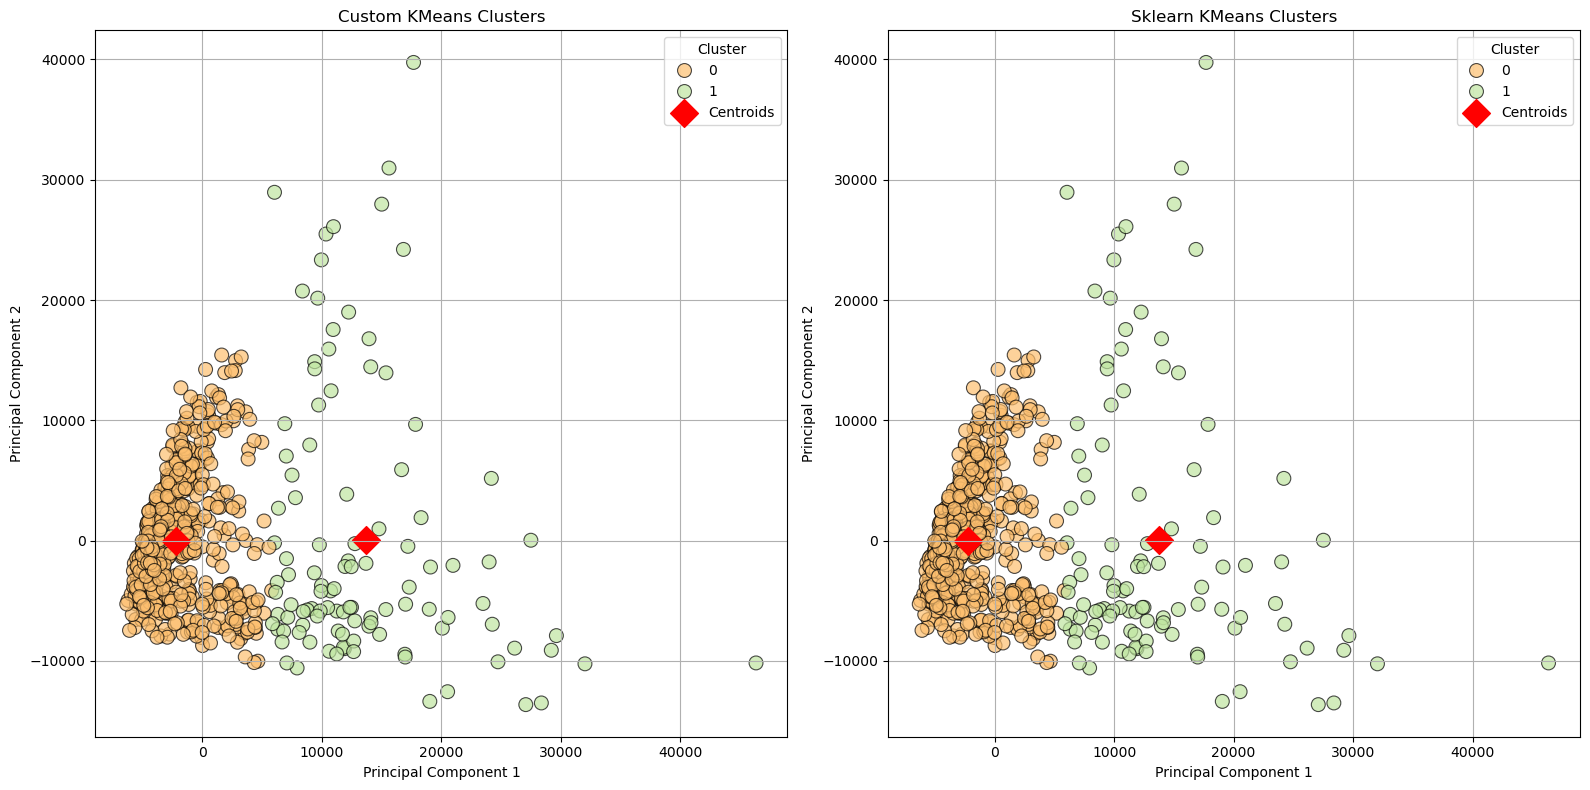

In [35]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
Private = data['Private']
# Trực quan hóa phân cụm
data_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
data_pca['Custom KMeans'] = labels_test_custom
data_pca['Sklearn KMeans'] = label_test_skkemans
data_pca['Ground Truth'] = Private

# Trực quan hóa centroids
# dùng class kmeans custom
centroids = test_custom_kmeans.cluster_centers
centroids_pca = pca.transform(centroids)
data_centroids = pd.DataFrame(data=centroids_pca, columns=['PCA1', 'PCA2'])
data_centroids['cluster'] = range(len(centroids))
# dùng sk kmeans
centroids = test_sk_kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
data_centroids_sk = pd.DataFrame(data=centroids_pca, columns=['PCA1', 'PCA2'])
data_centroids_sk['cluster'] = range(len(centroids))

plt.figure(figsize=(16, 8))
# vẽ biểu đồ thứ 1
plt.subplot(1, 2, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='Custom KMeans', data=data_pca, palette='Spectral', s=100, alpha=0.7, edgecolor='k')
plt.scatter(data_centroids_sk['PCA1'], data_centroids_sk['PCA2'], s=200, c='red', label='Centroids', marker='D')
plt.title('Custom KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid()
# vẽ biểu đồ thứ 2
plt.subplot(1, 2, 2)
sns.scatterplot(x='PCA1', y='PCA2', hue='Sklearn KMeans', data=data_pca, palette='Spectral', s=100, alpha=0.7, edgecolor='k')
plt.scatter(data_centroids['PCA1'], data_centroids['PCA2'], s=200, c='red', label='Centroids', marker='D')
plt.title('Sklearn KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.tight_layout()
plt.show()

- Nhận xét đầu tiên có thể biên giới giữa các cluster có sự phân chia rõ ràng ở hai thuật toán đối với dữ liệu không có scale điều này sẽ làm ít nhầm lẫn giữa các cluster ở hai thuật toán. Còn lại mật độ dữ liệu ở hai cluster cũng từ đó và nhìn hình ảnh có thể thấy sự tương đồng của hai thuật toán có vẻ là gần như nhau